**Pre-carga**

In [144]:
C2K = list()
C2K.append('session_id')
C2K.append('tutor_id')
C2K.append('student_id')
C2K.append('timestamp')
C2K.append('feedback_score')
C2K.append('wait_time')
C2K.append('ended_by_reason')
C2K.append('session_category')
C2K.append('consolidated_session_category')
C2K.append('student_complained')
C2K.append('student_complaint_clarity')
C2K.append('student_complaint_speed')
C2K.append('student_complaint_subject')
C2K.append('student_complaint_other')
C2K.append('session_tag_cheating')
C2K.append('session_tag_inappropriate')
C2K.append('session_tag_other_subject')
C2K.append('session_tag_no_material')
C2K.append('session_tag_student_left')
C2K.append('session_tag_student_not_engaging')
C2K.append('session_tag_used_whiteboard')
C2K.append('student_rating')
C2K.append('length_of_session')
C2K.append('avg_tutor_response_time')
C2K.append('max_tutor_response_time')
C2K.append('subject')
C2K.append('subtopic')
C2K.append('rubric_version')
C2K.append('tutor_gender')
C2K.append('tutor_international_name')
C2K.append('tutor_fired')
C2K.append('tutor_math_exam_score')
C2K.append('tutor_physics_exam_score')
C2K.append('tutor_chemistry_exam_score')
C2K.append('tutor_last_sign_in_country')
C2K.append('tutor_age')
C2K.append('student_platform')
C2K.append('student_app_version')
C2K.append('student_transactions_amount')

Importación de librerías

In [162]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [154]:
# dict es una estructura  de datos denominada dictionary, permite construir valores de clave,valor
T2F = dict()
T2F['tutor_id'] = pd.Int64Dtype()
T2F['timestamp'] = 'datetime64[ns, UTC]'
T2F['student_rating'] = pd.Int64Dtype()
T2F['tutor_fired'] = bool
T2F['tutor_age'] = pd.Int64Dtype()


Lectura del csv

In [139]:
from google.colab import files   # para poder leer archivos que están en mi pc

uploaded = files.upload()

Saving datadump.csv to datadump (1).csv


In [152]:
df = pd.read_csv('datadump.csv')
display(df.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(63265, 111)

In [155]:
# Remuevo espacios al inicio y final del nombre de la columna
df.columns = [column.strip() for column in df.columns]

# Tomo solo las columnas que vamos a necesitar
df = df[C2K]

# Se corrigen los tipos de los datos 
df = df.astype(T2F)

display(df.shape)

(63265, 39)

Consigna: Elegir (al menos) tres variables, las cuales crean que pueden estar correlacionadas con la satisfacción del estudiante al terminar el diálogo.


Pasos:
1. Las variables seleccionadas son: student_rating, wait_time, length_of_session  y feedback_score.

1. Se eliminaron los valores NA de las variables student_rating, wait_time, length_of_session  y feedback_score.

1. Discretizar la varibale feedback_score 
 
1. Graficar 

1. Calcular la correlación con la fórmula de Spearman 

In [273]:
# 1 y 2 
#df_sinNA = df.dropna(subset=['student_rating', 'wait_time'])
df_sinNA = df.dropna(subset=['student_rating', 'wait_time', 'length_of_session', 'feedback_score'])
df_graficos = df_sinNA.loc[:, ["student_rating", "wait_time", "feedback_score", "length_of_session"]]

## **Gráfico de regresión lineal entre student_rating y wait_time**

In [274]:
# convierto de secs a minutos  #intenté hacer lo mismo que con duración de sesión pero no da
df_graficos['wait_time'] = (df_sinNA['wait_time'] > 0.0)
df_graficos['wait_time'] = (df_sinNA['wait_time'] / 60)
df_graficos['wait_time'] = round(df_graficos['wait_time'],1)
print(df_graficos['wait_time'])

0        0.755177
2        0.168605
4        0.132678
5        0.082684
7        0.097909
           ...   
63260    0.293335
63261    0.169449
63262    0.130577
63263    0.108119
63264    0.187444
Name: wait_time, Length: 45034, dtype: float64


TypeError: ignored

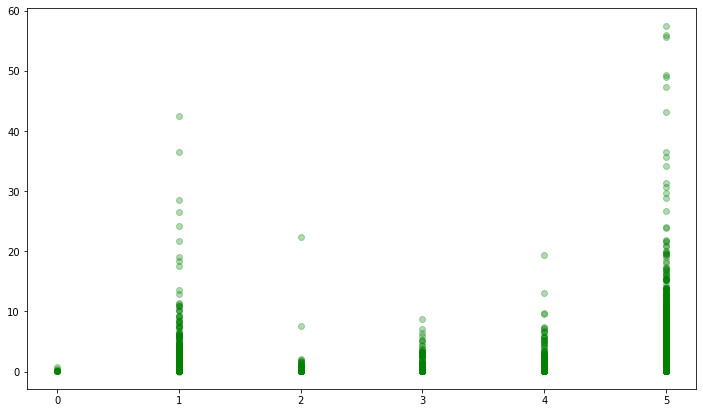

In [286]:
# 4- Gráfico de regresión lineal entre student_rating y wait_time
plt.figure(figsize=(12,7))
seaborn.regplot(x= 'student_rating', y= 'wait_time', data= df_graficos ,scatter_kws={'color':'green', 'alpha':0.3},line_kws={'color':'red'})
plt.title('¿Existe relación entre el puntaje asignado a los profesores\n  y el tiempo de espera?',
             fontsize=16, weight="bold")
plt.xlabel('puntaje asignado al tutor')
plt.ylabel('tiempo de espera (en minutos)')
seaborn.despine()
plt.show()
# plt.xlim([-1, 6])

Otro tipo de gráfico entre student_rating y wait_time

TypeError: ignored

<Figure size 720x720 with 0 Axes>

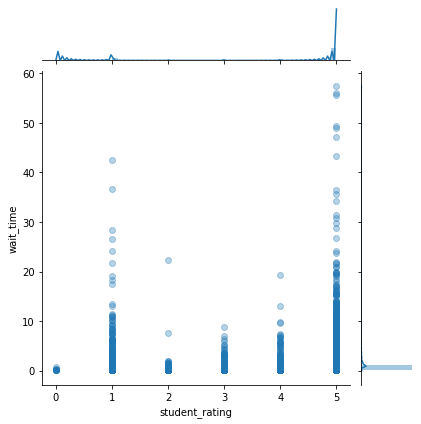

In [285]:
# 4-
plt.figure(figsize=(12,7))
seaborn.jointplot(x= 'student_rating', y= 'wait_time', data= df_graficos, kind="reg",
                 line_kws={'color':'green'},
                 scatter_kws={'alpha': 0.33})
plt.title('¿Existe relación entre el puntaje asignado a los profesores\n  y el tiempo de espera?',fontsize=16, weight="bold", y=1.05)
plt.xlabel('puntaje asignado al tutor')
plt.ylabel('tiempo de espera (en min)')
seaborn.despine()
plt.show()

**Scatterplot**

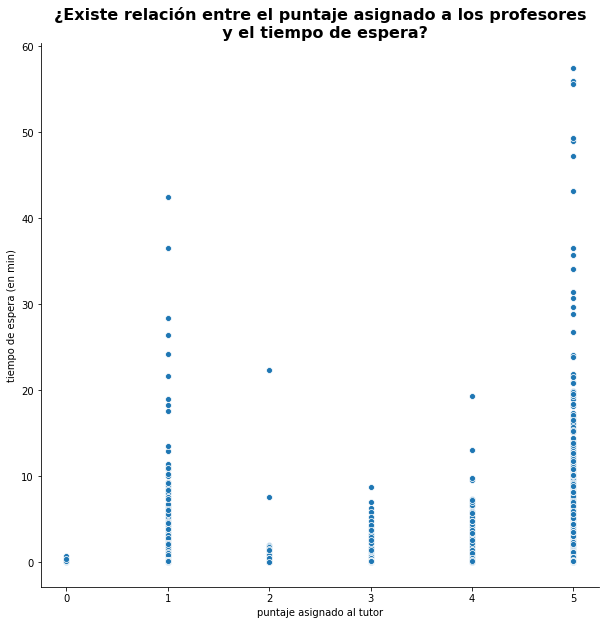

In [279]:
plt.figure(figsize=(12,7))
seaborn.scatterplot(data= df_graficos, x="student_rating", y="wait_time")
plt.title('¿Existe relación entre el puntaje asignado a los profesores\n  y el tiempo de espera?',
             fontsize=16, weight="bold")
plt.xlabel('puntaje asignado al tutor')
plt.ylabel('tiempo de espera (en min)')
seaborn.despine()
plt.show()
                 

## **Gráfico de regresión lineal entre student_rating y length_of_session**

In [ ]:
# 3-
df_sinNA['feedback_score'] = df_sinNA['feedback_score'].apply(lambda x: int(10*x))
print(df_sinNA['feedback_score'])

In [288]:
# 4- Gráfico de regresión lineal entre student_rating y length_of_session
df_graficos['length_of_session'] = df_sinNA[df_sinNA.length_of_session  > 0.0]
df_graficos['length_of_session'] = (df_sinNA['length_of_session'] / 60)
df_graficos['length_of_session'] = round(df_graficos['length_of_session'],1)
print(df_graficos['length_of_session'])


0          8.7
2          4.3
4         12.8
5         57.7
7         15.6
         ...  
63260     19.2
63261     26.9
63262    102.3
63263     15.0
63264     17.8
Name: length_of_session, Length: 45034, dtype: float64


TypeError: ignored

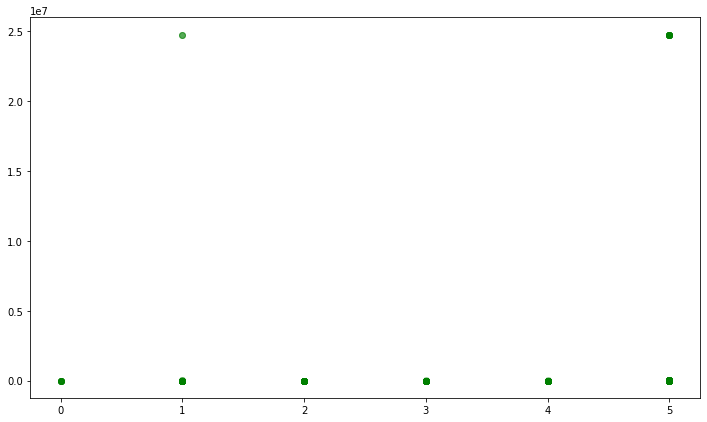

In [290]:
# en el eje y no toma los valores correspondientes, no sé por qué??
plt.figure(figsize=(12,7))
seaborn.regplot(x="student_rating", y= "length_of_session", data= df_graficos,
            scatter_kws={'color':'green', 'alpha':0.3},
            line_kws={'color':'red'})
plt.title('¿Existe relación entre el puntaje asignado a los profesores\n  y la duración de la sesión?',fontsize=16, weight="bold")
plt.xlabel('puntaje asignado al tutor')
plt.ylabel('duración de la sesión (en minutos)')
seaborn.despine()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(data= df_graficos, x="student_rating", y="length_of_session")
             

## **Gráfico pairplot**

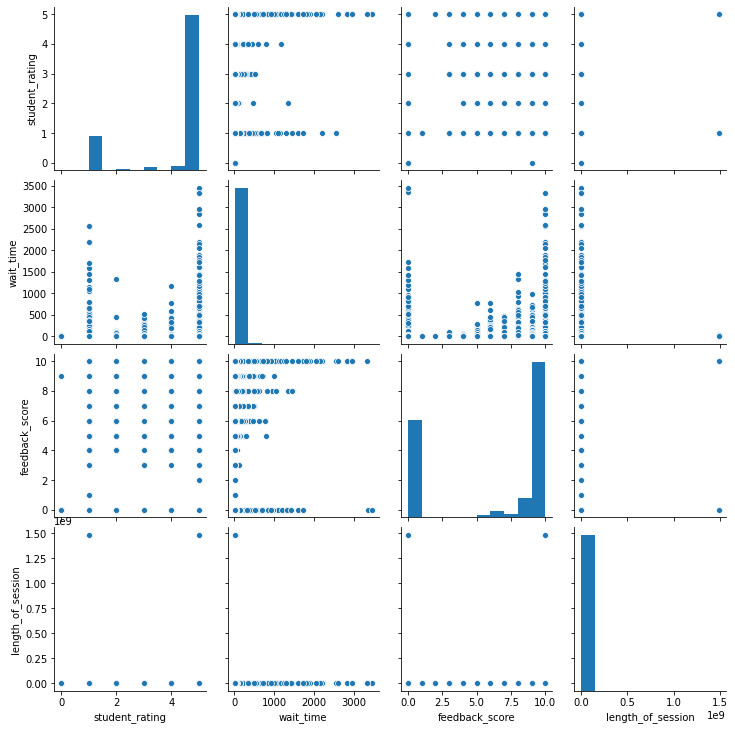

In [294]:
df_pairplot = df_sinNA.loc[:, ["student_rating", "wait_time", "feedback_score", "length_of_session"]]
#plt.title('¿Existe relación entre el puntaje asignado a los profesores\n, el tiempo esperado, la duración de la sesión y el feedback_score?',fontsize=16, weight="bold")
plt.figure(figsize=(12,7))
seaborn.pairplot(data= df_pairplot)


**¿Existe relación entre el student_rating y el tiempo promedio de respuesta?**

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000.]),
 <a list of 9 Text major ticklabel objects>)

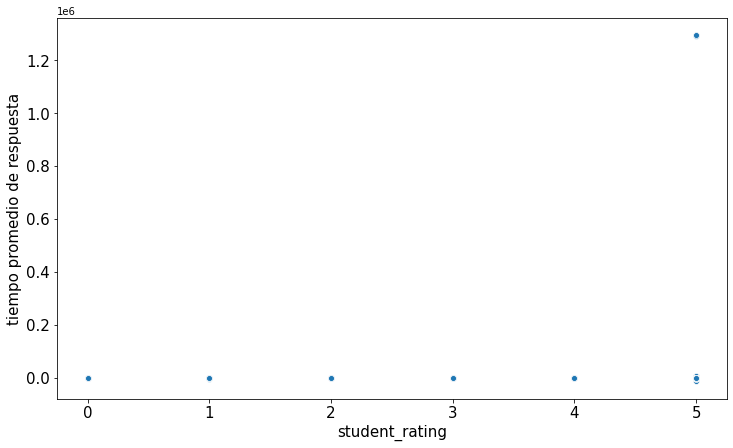

In [305]:
plt.figure(figsize=(12,7))
seaborn.scatterplot(data=df, x='student_rating', y='avg_tutor_response_time')
plt.xlabel('student_rating', fontsize=15)
plt.ylabel('tiempo promedio de respuesta', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)  #avg_tutor_response_time

## **5- Cálculo de coeficientes de correlación**

> Bloque con sangría



In [132]:
from scipy.stats import spearmanr

In [309]:
dfspearman = df[["student_rating", "wait_time", "feedback_score", "length_of_session", "avg_tutor_response_time"]].dropna().sort_values('student_rating')
dfspearman

,student_rating,wait_time,feedback_score,length_of_session,avg_tutor_response_time
2093,0,6.168583,0,70.000000,35.743000
2096,0,10.441382,0,359.000000,34.836000
2092,0,6.093039,0,329.000000,46.112333
2090,0,5.117397,0,385.000000,38.276499
2063,0,45.384361,0,170.071000,51.075999
...,...,...,...,...,...
26687,5,9.441475,10,405.795481,12.521045
26688,5,6.962084,10,1117.179295,21.947472
26690,5,61.091635,10,2194.278567,32.048946
26692,5,11.473781,10,877.328332,33.837970


## **¿Existe correlación entre las variables student_rating y tiempo_espera?** 

In [312]:
spearman_p2 = spearmanr(dfspearman['student_rating'],dfspearman['wait_time'])
spearman_p2

SpearmanrResult(correlation=-0.0051036469937166444, pvalue=0.28181389628242604)

##  **¿Existe correlación entre las variables student_rating y feedback_score?**

In [298]:
spearman_p = spearmanr(dfspearman['student_rating'],dfspearman['feedback_score'])
spearman_p

SpearmanrResult(correlation=0.28896379457936233, pvalue=0.0)

¿Relación entre student_rating y tiempo_espera?

In [134]:
spearman_p2 = spearmanr(dfspearman['student_rating'],dfspearman['wait_time'])
spearman_p2

SpearmanrResult(correlation=-0.005772916254201674, pvalue=0.22466192114367556)

## **¿Existe correlación entre las variables student_rating y length_of_session?**


In [299]:
spearman_p3 = spearmanr(dfspearman['student_rating'],dfspearman['length_of_session'])
spearman_p3

SpearmanrResult(correlation=0.25888046849458857, pvalue=0.0)

## **¿Existe correlación entre las variables student_rating y length_of_session?**

In [310]:
spearman_p4 = spearmanr(dfspearman['student_rating'],dfspearman['avg_tutor_response_time'])
spearman_p4

SpearmanrResult(correlation=-0.08038980508298986, pvalue=1.1564231493488876e-64)